<h2> Bioinformatyka2 - kurs mały. Ćwiczenie1

W poniższym ćwiczeniu poznamy wybrane metody związane z analizą sekwencji oraz biologicznymi bazami danych. Część zadań będzie zrealizowana przy pomocy języka Python. Jeżeli chcemy wykonać jakiś skrypt, to zapisujemy go do pliku tekstowego z rozszerzeniem .py a następnie odpalamy w Terminalu wg: 

<h4><center> python3 przyklad.py</center></h4>

Niektóre fragmenty kodu wymagają pewnych bibliotek, należy je zamieścić na początku kodu. Najważniejsze z nich:

In [1]:
import numpy as np #biblioteka do operacji na wektorach, macierzach, funkcje matematyczne itd..
import matplotlib.pyplot as plt #biblioteka do rysowania
import random as r #modul do generowania liczb losowych itp

<h3> Entropia

Entropia (w teorii informacji) - średnia ważona ilości informacji niesionej przez pojedynczą wiadomość, gdzie wagami są prawdopodobieństwa nadania poszczególnych wiadomości (Shannon, 1948):


<h1><center>$ H = -\sum_i p_i \log_2 p_i$</center></h1>

Zacznijmy od przypadku rzutu monetą. Tutaj są dwa możliwe stany  - orzeł (O) lub reszka (R). Niech $p$ oznacza prawdopodobieństwo wyrzucenia orła. Wtedy $1-p$ opisuje prawdopodobieństwo wyrzucenia reszki.

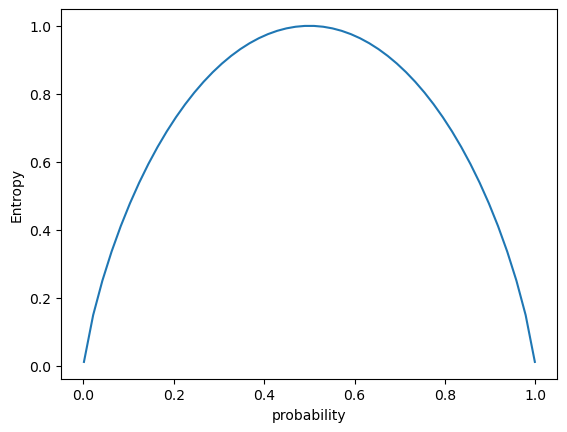

In [2]:
#przetestujemy kilka wartosci p i zobaczymy jak to wplywa na wartosc entropii
p = np.linspace(0.001,0.999,50) #będze sprawdzal rozne wartosci prawdopodobienstwa: od 0.001 do 0.999, 50 wartosci
h = -(p*np.log2(p)+(1-p)*np.log2(1-p)) #wzor na entropię w przypadku 2 stanow

plt.plot(p,h) #rysuje zaleznosc h od p
plt.xlabel("probability") #opis osi OX
plt.ylabel("Entropy") #opis osi OY
plt.show()

<h4> Przykład: Dana jest sekwencja nukleotydowa. Tutaj mamy do czyniania z 4 różnymi stanami (nukleotydy). Niech $p_A$, $p_G$, $p_C$ oraz $p_T$ oznaczają kolejno prawdopodobieństwo wystąpienia $A,G,C$ oraz $T$. Jaka jest maksymalna i minimalna wartość entropii w tym przypadku? Jakim sytuacjom to odpowiada?

<h3><center>$ H = -(\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}+\frac{1}{4} \log_2 \frac{1}{4}) = 2$</center></h3>  (maksymalna niepewność)

In [3]:
H = -(1/4*np.log2(1/4)+1/4*np.log2(1/4)+1/4*np.log2(1/4)+1/4*np.log2(1/4))
print(H)

2.0


<h3><center>$ H = -(1 \log_2 1+0 \log_2 0+0 \log_2 0+0 \log_2 0 ) = 0$</center></h3>

(brak niepewności)

Przyjmując $0\log_20 = 0$ (jest to uzasadnione bo $x\log_2x \rightarrow 0$ gdy $x \rightarrow 0^+$) mamy $H = 0$ (brak niepewności).

<h4> Zadanie1: Wyznacz maksymalną i minimalną wartość entropii dla sekwencji aminokwasowych. Wyjaśnij jakiego typu sekwencjom odpowiadają te wartości?

Logo sekwencji stanowi graficzna prezentacja podsumowania dopasowania wielosekwencyjnego. Zawiera informacje o częstości reszt na każdej pozycji oraz ich konserwatywności. Częstość reszt przedstawia wzajemna relacja wysokości liter, natomiast konserwatywność prezentowana jest jako różnica entropii maksymalnej oraz entropi uzyskanej dla danej pozycji.

<h4> Zadanie2. Będziemy analizować 16 sekwencji proteaz bakteryjnych. Centrum katalityczne tych proteaz obejmuje 3 reszty aminokwasowe: serynę (S), histydynę (H) i kwas asparaginowy (D).

- Wykonaj dopasowanie tych sekwencji (https://www.ebi.ac.uk/Tools/msa/clustalo/)

- Uzyskane dopasowanie wykorzystaj do wygenerowania tzw. logo sekwencji. (http://weblogo.threeplusone.com/create.cgi)
    
- W bazie UniProt (https://www.uniprot.org/) wyszukaj tę sekwencję Q9AER6 (po ID) i odszukaj miejsca występowania 3 reszt z centrum katalitycznego. Zlokalizuj je na dopasowaniu wszystkich 16 sekwencji - na dopasowaniu oraz/lub logo. Czy w przypadku pozostałych sekwencji obserwujemy konserwatywność na tych pozycjach?

- Na podstawie dopasowania sekwencji i/lub wygenerowanego logo, podaj potencjalne miejsca występowania tych reszt dla F4HL71. Porównaj te wyniki z informacjami w bazie UniProt. Skomentuj otrzymane wyniki.
    

<h3> Badanie składu i szukanie wzorców w sekwencjach biologicznych

- Generowanie losowych sekwencji 

In [4]:
def textGenerator(length, dist={'A':0.25, 'C':0.25,'G':0.25,'T':0.25}):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej czestosci liter alfabetu'''
    distT = []
    h = 0
    for (k, v) in dist.items():
        h += v
        distT.append((k,h))
    s = ''
    for x in range(length):
        ran = r.random()
        for k,v in distT:
            if ran <= v:
                s+=k
                break
    return s

#przyklad
seq = textGenerator(10)
print(seq)

GTACCATTTG


In [5]:
#Bieżący nukleotyd jest zależny od wcześniejszego (model Markowa rzędu 1):

def random2(length, nuc, firstN, trans):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej macierzy przejsc'''
    s_losowa = ''
    for i in range(length):
        if i>0:
            s_losowa+=np.random.choice(nuc, 1, p=trans[s_losowa[-1]])[0]
        else:
            s_losowa+=np.random.choice(nuc, 1, p=firstN)[0]
    return s_losowa



## przyklad
nuc = ["A","C","G","T"]
trans = {} #macierz przejsc

#              "A",  "C",  "G",  "T"
trans['A'] = [0.25, 0.25, 0.25, 0.25]
trans['C'] = [ 0.0,  1/3,  1/3,  1/3]
trans['G'] = [0.25, 0.25, 0.25, 0.25]
trans['T'] = [0.25, 0.25, 0.25, 0.25]

firstN = [0.25, 0.25, 0.25, 0.25] #piewszy nukleotyd będzie zupelnie losowy

#przyklad
seq = random2(100, nuc, firstN, trans)
print(seq)

ATCGGATCCTCTGTACTCCGGGGAACGACCCGCGCTTCGCTGGGGCTGCCCCCGGAGCCTGGGAGATCCCCCTTTCCGACGTGCTCCTCTAATAGGTACG


 - Proste statystyki dla sekwencji

In [6]:
#Wyznaczanie częstosci nukleotydów i dinukleotydów dla zadanej sekwencji 

seq='TGACCCCGGTTAAGAGCTAAGATCGCTTTAGGCGTTGGCGAAGTATCCTCTACGTCCTTCGGGAGAAAAGCTGTAGAGGTATCGCTTACTGATTGACTCC'

letters = {'A':0, 'C':0, 'G':0, 'T':0}
diplets = {'AG':0, 'GA':0, 'CA':0, 'AC':0, 'GC':0, 'CG':0, 'TA':0,'AT':0,'TG':0, 'GT':0,'CT':0,'TC':0, 'AA':0, 'CC':0, 'GG':0, 'TT':0}

n = len(seq)-1
for i in range(n):
    letters[seq[i]]+=1
    diplets[seq[i:(i+2)]]+=1
letters[seq[n]]+=1


sumL = sum(letters.values())
norL = {k:v/sumL for k,v in letters.items()}
sumD = sum(diplets.values())
norD = {k:v/sumD for k,v in diplets.items()}

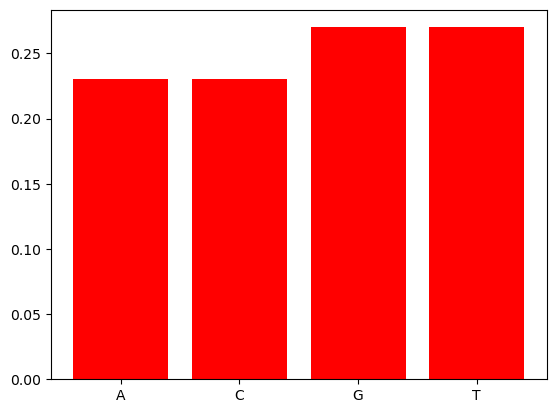

In [7]:
#wizuzalizacja dla nukleotydow

height_norL = norL.values()
bars = norL.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norL,color="red")
plt.xticks(y_pos, bars)
plt.show()

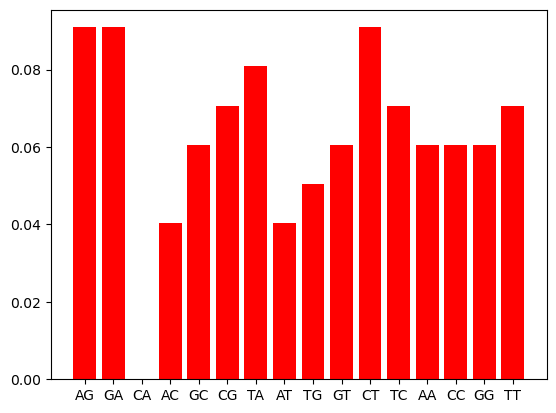

In [8]:
#wizuzalizacja dla dinukleotydow
height_norD = norD.values()
bars = norD.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norD,color="red")
plt.xticks(y_pos, bars)
plt.show()

- Reprezentacja gry chaosu

In [9]:
def CGR(seq):
    '''Funkcja wyznacza tzw. reprezentację gry chaosu dla danej sekwencji'''
    d = np.array([0.5,0.5])
    nt= ["A","C","G","T"]
    coordinates = np.array([[0,0],[0,1],[1,0],[1,1]])
    sequence = []
    for i in range(len(seq)):
        x=0.5*(d[len(d)-1]+coordinates[nt.index(seq[i])])
        sequence.append((x[0],x[1]))
        d = np.vstack((d, x))
    return np.array(sequence)

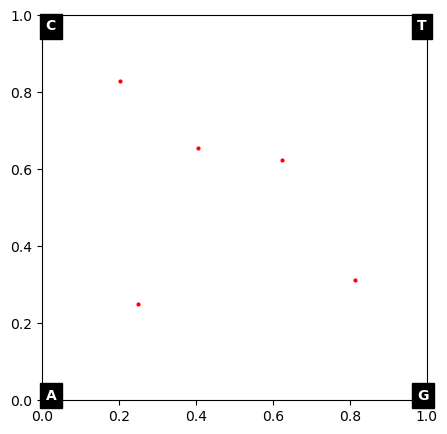

In [10]:
#przykladowe wywolanie tej funkcji i wizualizacja

seq = "ATGCC"
p1 = CGR(seq) #wykorzystuje funckje CGR, trzeba ją tez załączyc do kodu

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.scatter(p1[:,0],p1[:,1],c = "red", s = 4, label = "CGR")
#plt.scatter([0.5],[0.5])
ax.text(0.01, 0.03, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.01, 0.99, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.03, 'G', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.99, 'T', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')

plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("obrazek.png", dpi=300) #Jak chcemy zapisac do pliku to odkomentowac
plt.show()

<h4> Zadanie3. Wygeneruj sekwencję losową o długości 10000, w której nie ma A. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie4. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AG. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie5. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AT. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie6. Wykonanaj analogicznie obliczenia dla genomu mitochondrialnego. Skomentuj pokrótce otrzymane wyniki.

In [11]:
#NCBI ID: FJ986465.1

seq = "GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTGTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGACGAGCATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCGCTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAACACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGGACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAGCCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTGGGATTAGATACCCCACTATGCTTAGCCCTAAACCTCAACAGTTAAATCAACAAAACTGCTCGCCAGAACACTACGAGCCACAGCTTAAAACTCAAAGGACCTGGCGGTGCTTCATATCCCTCTAGAGGAGCCTGTTCTGTAATCGATAAACCCCGATCAACCTCACCACCTCTTGCTCAGCCTATATACCGCCATCTTCAGCAAACCCTGATGAAGGCTACAAAGTAAGCGCAAGTACCCACGTAAAGACGTTAGGTCAAGGTGTAGCCCATGAGGTGGCAAGAAATGGGCTACATTTTCTACCCCAGAAAACTACGATAGCCCTTATGAAACTTAAGGGTCGAAGGTGGATTTAGCAGTAAACTGAGAGTAGAGTGCTTAGTTGAACAGGGCCCTGAAGCGCGTACACACCGCCCGTCACCCTCCTCAAGTATACTTCAAAGGACATTTAACTAAAACCCCTACGCATTTATATAGAGGAGACAAGTCGTAACATGGTAAGTGTACTGGAAAGTGCACTTGGACGAACCAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGATTTCAACTTAACTTGACCGCTCTGAGCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCTTAGCCAAACCATTTACCCAAATAAAGTATAGGCGATAGAAATTGAAACCTGGCGCAATAGATATAGTACCGCAAGGGAAAGATGAAAAATTATAACCAAGCATAATATAGCAAGGACTAACCCCTATACCTTCTGCATAATGAATTAACTAGAAATAACTTTGCAAGGAGAGCCAAAGCTAAGACCCCCGAAACCAGACGAGCTACCTAAGAACAGCTAAAAGAGCACACCCGTCTATGTAGCAAAATAGTGGGAAGATTTATAGGTAGAGGCGACAAACCTACCGAGCCTGGTGATAGCTGGTTGTCCAAGATAGAATCTTAGTTCAACTTTAAATTTGCCCACAGAACCCTCTAAATCCCCTTGTAAATTTAACTGTTAGTCCAAAGAGGAACAGCTCTTTGGACACTAGGAAAAAACCTTGTAGAGAGAGTAAAAAATTTAACACCCATAGTAGGCCTAAAAGCAGCCACCAATTAAGAAAGCGTTCAAGCTCAACACCCACTACCTAAAAAATCCCAAACATATAACTGAACTCCTCACACCCAATTGGACCAATCTATCACCCTATAGAAGAACTAATGTTAGTATAAGTAACATGAAAACATTCTCCTCCGCATAAGCCTGCGTCAGATTAAAACACTGAACTGACAATTAACAGCCCAATATCTACAATCAACCAACAAGTCATTATTACCCTCACTGTCAACCCAACACAGGCATGCTCATAAGGAAAGGTTAAAAAAAGTAAAAGGAACTCGGCAAATCTTACCCCGCCTGTTTACCAAAAACATCACCTCTAGCATCACCAGTATTAGAGGCACCGCCTGCCCAGTGACACATGTTTAACGGCCGCGGTACCCTAACCGTGCAAAGGTAGCATAATCACTTGTTCCTTAAATAGGGACCTGTATGAATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTAACCAGTGAAATTGACCTGCCCGTGAAGAGGCGGGCATGACACAGCAAGACGAGAAGACCCTATGGAGCTTTAATTTATTAATGCAAACAGTACCTAACAAACCCACAGGTCCTAAACTACCAAACCTGCATTAAAAATTTCGGTTGGGGCGACCTCGGAGCAGAACCCAACCTCCGAGCAGTACATGCTAAGACTTCACCAGTCAAAGCGAACTACTATACTCAATTGATCCAATAACTTGACCAACGGAACAAGTTACCCTAGGGATAACAGCGCAATCCTATTCTAGAGTCCATATCAACAATAGGGTTTACGACCTCGATGTTGGATCAGGACATCCCGATGGTGCAGCCGCTATTAAAGGTTCGTTTGTTCAACGATTAAAGTCCTACGTGATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACTTCAAATTCCTCCCTGTACGAAAGGACAAGAGAAATAAGGCCTACTTCACAAAGCGCCTTCCCCCGTAAATGATATCATCTCAACTTAGTATTATACCCACACCCACCCAAGAACAGGGTTTGTTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACAGTCAGAGGTTCAATTCCTCTTCTTAACAACATACCCATGGCCAACCTCCTACTCCTCATTGTACCCATTCTAATCGCAATGGCATTCCTAATGCTTACCGAACGAAAAATTCTAGGCTATATACAACTACGCAAAGGCCCCAACGTTGTAGGCCCCTACGGGCTACTACAACCCTTCGCTGACGCCATAAAACTCTTCACCAAAGAGCCCCTAAAACCCGCCACATCTACCATCACCCTCTACATCACCGCCCCGACCTTAGCTCTCACCATCGCTCTTCTACTATGAACCCCCCTCCCCATACCCAACCCCCTGGTCAACCTCAACCTAGGCCTCCTATTTATTCTAGCCACCTCTAGCCTAGCCGTTTACTCAATCCTCTGATCAGGGTGAGCATCAAACTCAAACTACGCCCTGATCGGCGCACTGCGAGCAGTAGCCCAAACAATCTCATATGAAGTCACCCTAGCCATCATTCTACTATCAACATTACTAATAAGTGGCTCCTTTAACCTCTCCACCCTTATCACAACACAAGAACACCTCTGATTACTCCTGCCATCATGACCCTTGGCCATAATATGATTTATCTCCACACTAGCAGAGACCAACCGAACCCCCTTCGACCTTGCCGAAGGGGAGTCCGAACTAGTCTCAGGCTTCAACATCGAATACGCCGCAGGCCCCTTCGCCCTATTCTTCATAGCCGAATACACAAACATTATTATAATAAACACCCTCACCACTACAATCTTCCTAGGAACAACATATGACGCACTCTCCCCTGAACTCTACACAACATATTTTGTCACCAAGACCCTACTTCTAACCTCCCTGTTCTTATGAATTCGAACAGCATACCCCCGATTCCGCTACGACCAACTCATACACCTCCTATGAAAAAACTTCCTACCACTCACCCTAGCATTACTTATATGATATGTCTCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATATGTCTGATAAAAGAGTTACTTTGATAGAGTAAATAATAGGAGCTTAAACCCCCTTATTTCTAGGACTATGAGAATCGAACCCATCCCTGAGAATCCAAAATTCTCCGTGCCACCTATCACACCCCATCCTAAAGTAAGGTCAGCTAAATAAGCTATCGGGCCCATACCCCGAAAATGTTGGTTATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTTTACCTGAGTAGGCCTAGAAATAAACATGCTAGCTTTTATTCCAGTTCTAACCAAAAAAATAAACCCTCGTTCCACAGAAGCTGCCATCAAGTATTTCCTCACGCAAGCAACCGCATCCATAATCCTTCTAATAGCTATCCTCTTCAACAATATACTCTCCGGACAATGAACCATAACCAATACTACCAATCAATACTCATCATTAATAATCATAATGGCTATAGCAATAAAACTAGGAATAGCCCCCTTTCACTTCTGAGTCCCAGAGGTTACCCAAGGCACCCCTCTGACATCCGGCCTGCTTCTTCTCACATGACAAAAACTAGCCCCCATCTCAATCATATACCAAATCTCTCCCTCACTAAACGTAAGCCTTCTCCTCACTCTCTCAATCTTATCCATCATAGCAGGCAGTTGAGGTGGATTAAACCAAACCCAGCTACGCAAAATCTTAGCATACTCCTCAATTACCCACATAGGATGAATAATAGCAGTTCTACCGTACAACCCTAACATAACCATTCTTAATTTAACTATTTATATTATCCTAACTACTACCGCATTCCTACTACTCAACTTAAACTCCAGCACCACGACCCTACTACTATCTCGCACCTGAAACAAGCTAACATGACTAACACCCTTAATTCCATCCACCCTCCTCTCCCTAGGAGGCCTGCCCCCGCTAACCGGCTTTTTGCCCAAATGGGCCATTATCGAAGAATTCACAAAAAACAATAGCCTCATCATCCCCACCATCATAGCCACCATCACCCTCCTTAACCTCTACTTCTACCTACGCCTAATCTACTCCACCTCAATCACACTACTCCCCATATCTAACAACGTAAAAATAAAATGACAGTTTGAACATACAAAACCCACCCCATTCCTCCCCACACTCATCGCCCTTACCACGCTACTCCTACCTATCTCCCCTTTTATACTAATAATCTTATAGAAATTTAGGTTAAATACAGACCAAGAGCCTTCAAAGCCCTCAGTAAGTTGCAATACTTAATTTCTGTAACAGCTAAGGACTGCAAAACCCCACTCTGCATCAACTGAACGCAAATCAGCCACTTTAATTAAGCTAAGCCCTTACTAGACCAATGGGACTTAAACCCACAAACACTTAGTTAACAGCTAAGCACCCTAATCAACTGGCTTCAATCTACTTCTCCCGCCGCCGGGAAAAAAGGCGGGAGAAGCCCCGGCAGGTTTGAAGCTGCTTCTTCGAATTTGCAATTCAATATGAAAATCACCTCGGAGCTGGTAAAAAGAGGCCTAACCCCTGTCTTTAGATTTACAGTCCAATGCTTCACTCAGCCATTTTACCTCACCCCCACTGATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGGCGCATGAGCTGGAGTCCTAGGCACAGCTCTAAGCCTCCTTATTCGAGCCGAGCTGGGCCAGCCAGGCAACCTTCTAGGTAACGACCACATCTACAACGTTATCGTCACAGCCCATGCATTTGTAATAATCTTCTTCATAGTAATACCCATCATAATCGGAGGCTTTGGCAACTGACTAGTTCCCCTAATAATCGGTGCCCCCGATATGGCGTTTCCCCGCATAAACAACATAAGCTTCTGACTCTTACCTCCCTCTCTCCTACTCCTGCTCGCATCTGCTATAGTGGAGGCCGGAGCAGGAACAGGTTGAACAGTCTACCCTCCCTTAGCAGGGAACTACTCCCACCCTGGAGCCTCCGTAGACCTAACCATCTTCTCCTTACACCTAGCAGGTGTCTCCTCTATCTTAGGGGCCATCAATTTCATCACAACAATTATCAATATAAAACCCCCTGCCATAACCCAATACCAAACGCCCCTCTTCGTCTGATCCGTCCTAATCACAGCAGTCCTACTTCTCCTATCTCTCCCAGTCCTAGCTGCTGGCATCACTATACTACTAACAGACCGCAACCTCAACACCACCTTCTTCGACCCCGCCGGAGGAGGAGACCCCATTCTATACCAACACCTATTCTGATTTTTCGGTCACCCTGAAGTTTATATTCTTATCCTACCAGGCTTCGGAATAATCTCCCATATTGTAACTTACTACTCCGGAAAAAAAGAACCATTTGGATACATAGGTATGGTCTGAGCTATGATATCAATTGGCTTCCTAGGGTTTATCGTGTGAGCACACCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTCACCTCCGCTACCATAATCATCGCTATCCCCACCGGCGTCAAAGTATTTAGCTGACTCGCCACACTCCACGGAAGCAATATGAAATGATCTGCTGCAGTGCTCTGAGCCCTAGGATTCATCTTTCTTTTCACCGTAGGTGGCCTGACTGGCATTGTATTAGCAAACTCATCACTAGACATCGTACTACACGACACGTACTACGTTGTAGCTCACTTCCACTATGTCCTATCAATAGGAGCTGTATTTGCCATCATAGGAGGCTTCATTCACTGATTTCCCCTATTCTCAGGCTACACCCTAGACCAAACCTACGCCAAAATCCATTTCACTATCATATTCATCGGCGTAAATCTAACTTTCTTCCCACAACACTTTCTCGGCCTATCCGGAATGCCCCGACGTTACTCGGACTACCCCGATGCATACACCACATGAAACATCCTATCATCTGTAGGCTCATTCATTTCTCTAACAGCAGTAATATTAATAATTTTCATGATTTGAGAAGCCTTCGCTTCGAAGCGAAAAGTCCTAATAGTAGAAGAACCCTCCATAAACCTGGAGTGACTATATGGATGCCCCCCACCCTACCACACATTCGAAGAACCCGTATACATAAAATCTAGACAAAAAAGGAAGGAATCGAACCCCCCAAAGCTGGTTTCAAGCCAACCCCATGGCCTCCATGACTTTTTCAAAAAGGTATTAGAAAAACCATTTCATAACTTTGTCAAAGTTAAATTATAGGCTAAATCCTATATATCTTAATGGCACATGCAGCGCAAGTAGGTCTACAAGACGCTACTTCCCCTATCATAGAAGAGCTTATCACCTTTCATGATCACGCCCTCATAATCATTTTCCTTATCTGCTTCCTAGTCCTGTATGCCCTTTTCCTAACACTCACAACAAAACTAACTAATACTAACATCTCAGACGCTCAGGAAATAGAAACCGTCTGAACTATCCTGCCCGCCATCATCCTAGTCCTCATCGCCCTCCCATCCCTACGCATCCTTTACATAACAGACGAGGTCAACGATCCCTCCCTTACCATCAAATCAATTGGCCACCAATGGTACTGAACCTACGAGTACACCGACTACGGCGGACTAATCTTCAACTCCTACATACTTCCCCCATTATTCCTAGAACCAGGCGACCTGCGACTCCTTGACGTTGACAATCGAGTAGTACTCCCGATTGAAGCCCCCATTCGTATAATAATTACATCACAAGACGTCTTGCACTCATGAGCTGTCCCCACATTAGGCTTAAAAACAGATGCAATTCCCGGACGTCTAAACCAAACCACTTTCACCGCTACACGACCGGGGGTATACTACGGTCAATGCTCTGAAATCTGTGGAGCAAACCACAGTTTCATGCCCATCGTCCTAGAATTAATTCCCCTAAAAATCTTTGAAATAGGGCCCGTATTTACCCTATAGCACCCCCTCTAGAGCCCACTGTAAAGCTAACTTAGCATTAACCTTTTAAGTTAAAGATTAAGAGAACCAACACCTCTTTACAGTGAAATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCGCAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAATGACCCACCAATCACATGCCTATCATATAGTAAAACCCAGCCCATGACCCCTAACAGGGGCCCTCTCAGCCCTCCTAATGACCTCCGGCCTAGCCATGTGATTTCACTTCCACTCCATAACGCTCCTCATACTAGGCCTACTAACCAACACACTAACCATATACCAATGATGGCGCGATGTAACACGAGAAAGCACATACCAAGGCCACCACACACCACCTGTCCAAAAAGGCCTTCGATACGGGATAATCCTATTTATTACCTCAGAAGTTTTTTTCTTCGCAGGATTTTTCTGAGCCTTTTACCACTCCAGCCTAGCCCCTACCCCCCAATTAGGAGGGCACTGGCCCCCAACAGGCATCACCCCGCTAAATCCCCTAGAAGTCCCACTCCTAAACACATCCGTATTACTCGCATCAGGAGTATCAATCACCTGAGCTCACCATAGTCTAATAGAAAACAACCGAAACCAAATAATTCAAGCACTGCTTATTACAATTTTACTGGGTCTCTATTTTACCCTCCTACAAGCCTCAGAGTACTTCGAGTCTCCCTTCACCATTTCCGACGGCATCTACGGCTCAACATTTTTTGTAGCCACAGGCTTCCACGGACTTCACGTCATTATTGGCTCAACTTTCCTCACTATCTGCTTCATCCGCCAACTAATATTTCACTTTACATCCAAACATCACTTTGGCTTCGAAGCCGCCGCCTGATACTGGCATTTTGTAGATGTGGTTTGACTATTTCTGTATGTCTCCATCTATTGATGAGGGTCTTACTCTTTTAGTATAAATAGTACCGTTAACTTCCAATTAACTAGTTTTGACAACATTCAAAAAAGAGTAATAAACTTCGCCTTAATTTTAATAATCAACACCCTCCTAGCCTTACTACTAATAATTATTACATTTTGACTACCACAACTCAACGGCTACATAGAAAAATCCACCCCTTACGAGTGCGGCTTCGACCCTATATCCCCCGCCCGCGTCCCTTTCTCCATAAAATTCTTCTTAGTAGCTATTACCTTCTTATTATTTGATCTAGAAATTGCCCTCCTTTTACCCCTACCATGAGCCCTACAAACAACTAACCTGCCACTAATAGTTATGTCATCCCTCTTATTAATCATCATCCTAGCCCTAAGTCTGGCCTATGAGTGACTACAAAAAGGATTAGACTGAACCGAATTGGTATATAGTTTAAACAAAACGAATGATTTCGACTCATTAAATTATGATAATCATATTTACCAAATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCACTTCTAGGAATACTAGTATATCGCTCACACCTCATATCCTCCCTACTATGCCTAGAAGGAATAATACTATCGCTGTTCATTATAGCTACTCTCATAACCCTCAACACCCACTCCCTCTTAGCCAATATTGTGCCTATTGCCATACTAGTCTTTGCCGCCTGCGAAACAGCGGTGGGCCTAGCCCTACTAGTCTCAATCTCCAACACATATGGCCTAGACTACGTACATAACCTAAACCTACTCCAATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACATGACTTTCCAAAAAACACATAATTTGAATCAACACAACCACCCACAGCCTAATTATTAGCATCATCCCTCTACTATTTTTTAACCAAATCAACAACAACCTATTTAGCTGTTCCCCAACCTTTTCCTCCGACCCCCTAACAACCCCCCTCCTAATACTAACTACCTGACTCCTACCCCTCACAATCATGGCAAGCCAACGCCACTTATCCAGTGAACCACTATCACGAAAAAAACTCTACCTCTCTATACTAATCTCCCTACAAATCTCCTTAATTATAACATTCACAGCCACAGAACTAATCATATTTTATATCTTCTTCGAAACCACACTTATCCCCACCTTGGCTATCATCACCCGATGAGGCAACCAGCCAGAACGCCTGAACGCAGGCACATACTTCCTATTCTACACCCTAGTAGGCTCCCTTCCCCTACTCATCGCACTAATTTACACTCACAACACCCTAGGCTCACTAAACATTCTACTACTCACTCTCACTGCCCAAGAACTATCAAACTCCTGAGCCAACAACTTAATATGACTAGCTTACACAATAGCTTTTATAGTAAAGATACCTCTTTACGGACTCCACTTATGACTCCCTAAAGCCCATGTCGAAGCCCCCATCGCTGGGTCAATAGTACTTGCCGCAGTACTCTTAAAACTAGGCGGCTATGGTATAATACGCCTCACACTCATTCTCAACCCCCTGACAAAACACATAGCCTACCCCTTCCTTGTACTATCCCTATGAGGCATAATTATAACAAGCTCCATCTGCCTACGACAAACAGACCTAAAATCGCTCATTGCATACTCTTCAATCAGCCACATAGCCCTCGTAGTAACAGCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTCTCATAATCGCCCACGGACTTACATCCTCATTACTATTCTGCCTAGCAAACTCAAACTACGAACGCACTCACAGTCGCATCATAATCCTCTCTCAAGGACTTCAAACTCTACTCCCACTAATAGCTTTTTGATGACTTCTAGCAAGCCTCGCTAACCTCGCCTTACCCCCCACTATTAACCTACTGGGAGAACTCTCTGTGCTAGTAACCACATTCTCCTGATCAAATATCACTCTCCTACTTACAGGACTCAACATACTAGTCACAGCCCTATACTCCCTCTACATATTTACCACAACACAATGGGGCTCACTCACCCACCACATTAACAACATAAAACCCTCATTCACACGAGAAAACACCCTCATGTTCATACACCTATCCCCCATTCTCCTCCTATCCCTCAACCCCGACATCATTACCGGGTTTTCCTCTTGTAAATATAGTTTAACCAAAACATCAGATTGTGAATCTGACAACAGAGGCTTACGACCCCTTATTTACCGAGAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAACATGGCTTTCTCAACTTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATTTTGGTGCAACTCCAAATAAAAGTAATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAATTCCCCCCATCCTTACCACCCTCGTTAACCCTAACAAAAAAAACTCATACCCCCATTATGTAAAATCCATTGTCGCATCCACCTTTATTATCAGTCTCTTCCCCACAACAATATTCATGTGCCTAGACCAAGAAGTTATTATCTCGAACTGACACTGAGCCACAACCCAAACAACCCAGCTCTCCCTAAGCTTCAAACTAGACTACTTCTCCATAATATTCATCCCTGTAGCATTGTTCGTTACATGGTCCATCATAGAATTCTCACTGTGATATATAAACTCAGACCCAAACATTAATCAGTTCTTCAAATATCTACTCATCTTCCTAATTACCATACTAATCTTAGTTACCGCTAACAACCTATTCCAACTGTTCATCGGCTGAGAGGGCGTAGGAATTATATCCTTCTTGCTCATCAGTTGATGATACGCCCGAGCAGATGCCAACACAGCAGCCATTCAAGCAATCCTATACAACCGTATCGGCGATATCGGTTTCATCCTCGCCTTAGCATGATTTATCCTACACTCCAACTCATGAGACCCACAACAAATAGCCCTTCTAAACGCTAATCCAAGCCTCACCCCACTACTAGGCCTCCTCCTAGCAGCAGCAGGCAAATCAGCCCAATTAGGTCTCCACCCCTGACTCCCCTCAGCCATAGAAGGCCCCACCCCAGTCTCAGCCCTACTCCACTCAAGCACTATAGTTGTAGCAGGAATCTTCTTACTCATCCGCTTCCACCCCCTAGCAGAAAATAGCCCACTAATCCAAACTCTAACACTATGCTTAGGCGCTATCACCACTCTGTTCGCAGCAGTCTGCGCCCTTACACAAAATGACATCAAAAAAATCGTAGCCTTCTCCACTTCAAGTCAACTAGGACTCATAATAGTTACAATCGGCATCAACCAACCACACCTAGCATTCCTGCACATCTGTACCCACGCCTTCTTCAAAGCCATACTATTTATGTGCTCCGGGTCCATCATCCACAACCTTAACAATGAACAAGATATTCGAAAAATAGGAGGACTACTCAAAACCATACCTCTCACTTCAACTTCCCTCACCATTGGCAGCCTAGCATTAGCAGGAATACCTTTCCTCACAGGTTTCTACTCCAAAGACCACATCATCGAAACCGCAAACATATCATACACAAACGCCTGAGCCCTATCTATTACTCTCATCGCTACCTCCCTGACAAGCGCCTATAGCACTCGAATAATTCTTCTCACCCTAACAGGTCAACCTCGCTTCCCCACCCTTACTAACATTAACGAAAATAACCCCACCCTACTAAACCCCATTAAACGCCTGGCAGCCGGAAGCCTATTCGCAGGATTTCTCATTACTAACAACATTTCCCCCGCATCCCCCTTCCAAACAACAATCCCCCTCTACCTAAAACTCACAGCCCTCGCTGTCACTTTCCTAGGACTTCTAACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTATGCACATTTTATTTCTCCAACATACTCGGATTCTACCCTAGCATCACACACCGCGCAATCCCCTATCTAGGCCTTCTTACGAGCCAAAACCTGCCCCTACTCCTCCTAGACCTAACCTGACTAGAAAAGCTATTACCTAAAACAATTTCACAGCACCAAATCTCCACCTCCATCATCACCTCAACCCAAAAAGGCATAATTAAACTTTACTTCCTCTCTTTCTTCTTCCCACTCATCCTAACCCTACTCCTAATCACATAACCTATTCCCCCGAGCAATCTCAATTACAATATATACACCAACAAACAATGTTCAACCAGTAACTACTACTAATCAACGCCCATAATCATATAAAGCCCCCGCACCAATAGGATCCTCCCGAATCAACCCTGACCCCTCTCCTTCATAAATTATTCAGCTTCCTACACTATTAAAGTTTACCACAACCACCACCCCATCATACTCTTTCACCCACAGCACCAATCCTACCTCCATCGCTAACCCCACTAAAACACTCACCAAGACCTCAACCCCTGACCCCCATGCCTCAGGATACTCCTCAATAGCCATCGCTGTAGTATATCCAAAGACAACCACCATTCCCCCTAAATAAATTAAAAAAACTATTAAACCCATATAACCTCCCCCAAAATTCAGAATAATAACACACCCGACCACACCGCTAACAATCAATACTAAACCCCCATAAATAGGAGAAGGCTTAGAAGAAAACCCCACAAACCCCATTACTAAACCCACACTCAACAGAAACAAAGCATACATCATTATTCTCGCACGGACTACAACCACGACCAATGATATGAAAAACCATCGTTGTATTTCAACTACAAGAACACCAATGACCCCAATACGCAAAATTAACCCCCTAATAAAATTAATTAACCACTCATTCATCGACCTCCCCACCCCATCCAACATCTCCGCATGATGAAACTTCGGCTCACTCCTTGGCGCCTGCCTGATCCTCCAAATCACCACAGGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCTTTTCATCAATCGCCCACATCACTCGAGACGTAAATTATGGCTGAATCATCCGCTACCTTCACGCCAATGGCGCCTCAATATTCTTTATCTGCCTCTTCCTACACGTCGGGCGAGGCCTATATTACGGATCATTTCTCTACTCAGAAACCTGAAACATCGGCATTATCCTCCTGCTTGCAACTATAGCAACAGCCTTCATAGGCTATGTCCTCCCGTGAGGCCAAATATCATTCTGAGGGGCCACAGTAATTACAAACTTACTATCCGCCATCCCATACATTGGGACAGACCTAGTTCAATGAATCTGAGGAGGCTACTCAGTAGACAGTCCCACCCTCACACGATTCTTTACCTTTCACTTCATCTTGCCCTTCATTATTGCAGCCCTAGCAGCACTCCACCTCCTATTCTTGCACGAAACGGGATCAAACAACCCCCTAGGAATCACCTCCCATTCCGATAAAATCACCTTCCACCCTTACTACACAATCAAAGACGCCCTCGGCTTACTTCTCTTCCTTCTCTCCTTAATGACATTAACACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGCCAACCCCTTAAATACCCCTCCCCACATCAAGCCCGAATGATATTTCCTATTCGCCTACACAATTCTCCGATCCGTCCCTAACAAACTAGGAGGCGTCCTTGCCCTATTACTATCCATCCTCATCCTAGCAATAATCCCCATCCTCCATATATCCAAACAACAAAGCATAATATTTCGCCCACTAAGCCAATCACTTTATTGACTCCTAGCCGCAGACCTCCTCATTCTAACCTGAATCGGAGGACAACCAGTAAGCTACCCTTTTACCATCATTGGACAAGTAGCATCCGTACTATACTTCACAACAATCCTAATCCTAATACCAACTATCTCCCTAATTGAAAACAAAATACTCAAATGGGCCTGTCCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAAATGAAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATTCTAATTTAAACTATTCTCTGTTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCCCCCCATGCTTACAAGCAAGTACAGCAACCAACCCTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCCCATGGATGACCCCCCTCAGATAGGGGTCCCTTGACCACCATCCTCCGTGAAATCAATATCCCGCACAAGAGTGCTACTCTCCTCGCTCCGGGCCCATAACACTTGGGGGTAGCTAAAGTGAACTGTATCCGACATCTGGTTCCTACTTCAGGGCCATAAAGCCTAAATAGCCCACACGTTCCCCTTAAATAAGACATCACGATG"
len(seq)

16559

<h3> Metody porównania sekwencji biologicznych bez dopasowania (free-alignment methods)

- Metoda oparta o k-mery

In [12]:
def kmers(seq, k = 3):
    '''Funkcja wyznacza liczbę k-merow'''
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d

#przyklad dzialania
s1 = "ATGGTGG"
print(kmers(s1))

{'ATG': 1, 'TGG': 2, 'GGT': 1, 'GTG': 1}


In [13]:
#k-comparison

def k_comparison(seq1, seq2, k=3):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o k-mery'''
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    all_mers = []
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)


#przyklad dzialania
s1 = "ATGTGTG"
s2 = "CATGTG"
print(k_comparison(s1, s2))

1.73


- Metoda oparta o złożoność Lempel-Ziv

In [14]:
def WordSeq(seq):
    '''Funkcja wyznacza slowa w danej sekwencji'''
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and seq[::-1][-(i+k):-(i)] in d and i+k<l:
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k]) 
        i+=k  
        k=1   
    return d

#przyklad dzialania
print(WordSeq("ATGTGTGCATGTG"))

['A', 'T', 'G', 'TG', 'C', 'AT', 'GT']


In [15]:
def words_comparison(seq1, seq2):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o slowa'''
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C


#przyklad dzialania
s1 = "ATGTGTG"
s2 = "CATGTG"
print(words_comparison(s1, s2))

0.6


- Wykorzystamy sobie teraz jedną z tych metod do porównania sekwencji zapytania (query) z pewną grupą sekwencji celem znalezienia sekwencji podobnych (potencjalnie homologicznych).

<h4> Przykład. Dana jest sekwencja

In [16]:
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"

<h4> Z użyciem metody k-mer z $k=3$ porówaj sekwencję query z sekewencjami z pliku database_p. Narysuj odpowiedni histogram odległości pomiędzy zapytaniem (query) a kolejnymi sekwencjami z pliku. Które sekwencje są najbardziej podobne?

seq18
AKPDPHTKKHQYWLKPYELMEIYYQYRPFINFDQMRVGLRCEA
seq27
EKPHTKMHQYWLKPYELMEIYYQYRPFINDDQQMRVGLCEA
seq99
EKPDPHTKMHQYWLKPYELYRPFINFDQQMRVMLRCEA


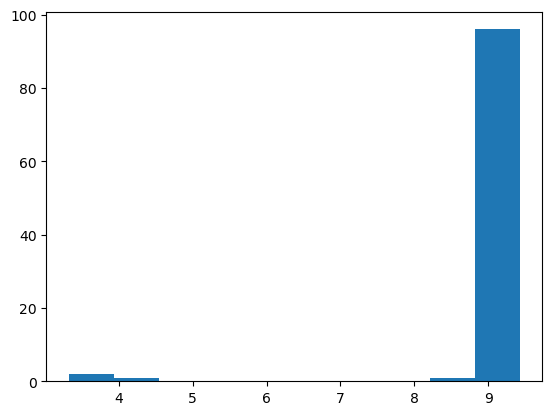

In [18]:
#tworze dwie puste listy, otwieram plik database_p, przechodząc go linijka po linijce do "n" i "s" wpisuje nazwy i sekwencje

n = []
s = []
with open('database_p', 'r') as f: #moze byc wymagane rowniez rozszerzenie txt (wtedy podmienic na database_p.txt)
    for line in f:  #przechodzimy po kazdej linijce
        line = line.rstrip() #tutaj strip() usuwa znaki konca linii (including "\n")
        if line.startswith('>'):
            n.append(line[1:])
        else:
            s.append(line)
            

#nasze zapytanie
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"

#tworzę pustą listę, przechodze kolejne sekwencje z pliku i z uzyciem metody k-mer porownuje je z zapytaniem
ks = []
for i in range(len(n)):
    ks.append(k_comparison(query, s[i])) #wywoluje metode k-mer z k=3 dla zapytania i kolejnej sekwencji z pliku
    if k_comparison(query, s[i]) < 5: #jezeli odleglosc jest mniejsza niz 5 to wyswietle te sekwencje
        print(n[i])
        print(s[i])

#rysuje histogram        
plt.hist(ks)
plt.show()

<h4> Zadanie7: Wykonaj analogicznie obliczenia stosując tym razem metodę Lempel-Ziv (podmień metodę k_comparison na words_comparison). Która sekwencja jest najbardziej podobna do zapytania?
  
<br>
    
Uwaga: W przypadku metody Lempel-Ziv  odległości są z mniejszego zakresu; najczęściej (0,1), chociaż mogą go nieznacznie przekraczać.

<h4> Zadanie8: Rozważ następujące sekwencje

In [ ]:
s1 = "CCCGCAATAAGTCGCCCGCGCACACCAGCAGCTCCGCGCAAGGGGCCTTAATCAATTGCTACCCCTACTTGGGCTACCTCCTTGCTGGAACTTGAAGGGA"
s2 = "CAATTGCTACCCCTACTTGGGCTACCTCCTTGCTGGAACTTGAAGGGACCCGCAATAAGTCGCCCGCGCACACCAGCAGCTCCGCGCAAGGGGCCTTAAT"

<h4> 

- Wykonaj dopasowanie tych sekwencji (za pomocą Clustal Omega, są to sekwencje DNA, wklej je w formacie FASTA)
- Porównaj te sekwencje za pomocą metody k-mer (k=5) oraz Lempel-Ziv. 
- ***Wygeneruj 1000 sekwencji losowych, tej samej długości co s1. Za pomocą metody k-mer oraz Lempel-Ziv porównaj sekwencję s1 oraz te sekwencje (podobnie jak w poprzednim przykładzie/zadaniu). Na tej podstawie stwierdź czy otrzymane odległości z poprzedniego punktu wskazują na duże bądź małe podobieństwo między sekwencjami.
- Możesz dodatkowo narysować macierz kropkową (https://www.ebi.ac.uk/jdispatcher/seqstats/emboss_dotmatcher)
- Czy te sekwencje są do siebie podobne?



*** - nieobowiązkowe

<h3> Biologiczne bazy danych

Poniższe zadania można wykonać bezpośrednio poprzez przeglądarkę, jednak zalecam spróbować skorzystać ze skryptów w języku Python. Są to skrypty: zad9.py, zad10.py oraz zad11.py.

<h4>

Zadanie9: Odszukaj pracę o identyfikatorze 14697198 w bazie danych PubMed, a następnie odpowiedz na pytania:
- jaki jest tytuł tej pracy?
- w jakim czasopiśmie została wydana ta praca?
- ilu autorów odpowiada za tę prace?
- podaj przykładowe MeSH termy z tej pracy.


- Do poniższego zadania przyda się pubmed_tags.png (zamieszczone w materiałach).

<h4> Zadanie10: Zaproponuj hasło do wyszukania prac posiadających w tytule mRNA, opublikowanych w 2017 roku w czasopiśmie BMC Genomics. Ile jest takich prac?

Skrypt zad10b.py pozwala dodatkowo wyświetlić tytuły prac dla danego zapytania.

<h4> Zadanie11: Z bazy Nucleotide pobierz sekwencje o następującach ID: NM_001012006.1, MK560199.1, AB046569.1. Zapisz je do jednego pliku w formacie FASTA, gdzie nazwa odpowiada organizmowi z którego dana sekwencja pochodzi [GBSeq_organism], natomiast sama sekwencja znajduje się w [GBSeq_sequence]. Dołącz do sprawozdania.